# Importing Libararies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Data for Project

In [2]:
df = pd.read_csv('HR_Employee_Attrition_Data.csv')

In [3]:
df.shape

(2940, 35)

In [4]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               3   
3                 3          4  Life Sciences              1               4   
4                 2          1        Medical              1               5   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [5]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

# Setting Display options to ensure feature name visibility

In [6]:
pd.set_option('display.max_columns', None)

# Warning supression

In [7]:
import warnings
warnings.filterwarnings('ignore')

# Drop ID Feature from the Dataset

In [8]:
df = df.drop(['EmployeeNumber'], axis = 1)

# Create Target Feature

In [9]:
# Attrition is in object, so we need to convert it into 0 & 1
df['target'] = np.where(df.Attrition =='Yes', 1, 0)

In [10]:
df.drop(['Attrition'], axis =1, inplace = True)

# Defining Target and Independent features

In [11]:
Y = df[['target']]
x = df.drop(['target'], axis =1)

# Get the Attrition Rate (Event Rate)

In [12]:
Y.mean()

target    0.161224
dtype: float64

# Split Features into categorical and numerical

In [13]:
num = x.select_dtypes(include = 'number')
char = x.select_dtypes(include = 'object')

In [14]:
# Value counts --> It give number of times each unique value in feature is used.
# counts --> COunting those unique values
def unique_levels(x):
    x = x.value_counts().count()
    return(x)
df_value_counts = pd.DataFrame(num.apply(lambda x : unique_levels(x)))

In [15]:
df_value_counts.columns = ['Feature_levels']
df_value_counts.head()

Feature_levels
Age                           43
DailyRate                    886
DistanceFromHome              29
Education                      5
EmployeeCount                  1

In [16]:
# We will slice the feature where unique values are lesss than equal to 20 to keep them in categorical data.
slice1 = df_value_counts.loc[df_value_counts['Feature_levels']<=20]
cat_list = slice1.index
cat = num.loc[:,cat_list]
cat.dtypes

Education                   int64
EmployeeCount               int64
EnvironmentSatisfaction     int64
JobInvolvement              int64
JobLevel                    int64
JobSatisfaction             int64
NumCompaniesWorked          int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
dtype: object

In [17]:
slice2 = df_value_counts.loc[df_value_counts['Feature_levels']>20]
num_list = slice2.index
num = num.loc[:,num_list]
num.dtypes

Age                  int64
DailyRate            int64
DistanceFromHome     int64
HourlyRate           int64
MonthlyIncome        int64
MonthlyRate          int64
TotalWorkingYears    int64
YearsAtCompany       int64
dtype: object

In [18]:
num.dtypes

Age                  int64
DailyRate            int64
DistanceFromHome     int64
HourlyRate           int64
MonthlyIncome        int64
MonthlyRate          int64
TotalWorkingYears    int64
YearsAtCompany       int64
dtype: object

In [19]:
num.shape

(2940, 8)

In [20]:
char = pd.concat([char, cat], axis = 1, join = 'inner' )

In [21]:
char.head()

BusinessTravel              Department EducationField  Gender  \
0      Travel_Rarely                   Sales  Life Sciences  Female   
1  Travel_Frequently  Research & Development  Life Sciences    Male   
2      Travel_Rarely  Research & Development          Other    Male   
3  Travel_Frequently  Research & Development  Life Sciences  Female   
4      Travel_Rarely  Research & Development        Medical    Male   

                 JobRole MaritalStatus Over18 OverTime  Education  \
0        Sales Executive        Single      Y      Yes          2   
1     Research Scientist       Married      Y       No          1   
2  Laboratory Technician        Single      Y      Yes          2   
3     Research Scientist       Married      Y      Yes          4   
4  Laboratory Technician       Married      Y       No          1   

   EmployeeCount  EnvironmentSatisfaction  JobInvolvement  JobLevel  \
0              1                        2               3         2   
1              1                        3               2         2   
2              1                        4               2         1   
3              1                        4               3         1   
4              1                        1               3         1   

   JobSatisfaction  NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
0                4                   8                 11                  3   
1                2                   1                 23                  4   
2                3                   6                 15                  3   
3                3                   1                 11                  3   
4                2                   9                 12                  3   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                         1             80                 0   
1                         4             80                 1   
2                         2             80                 0   
3                         3             80                 0   
4                         4             80                 1   

   TrainingTimesLastYear  WorkLifeBalance  YearsInCurrentRole  \
0                      0                1                   4   
1                      3                3                   7   
2                      3                3                   0   
3                      3                3                   7   
4                      3                3                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

# Outier Analysis of Numemrical Features

In [23]:
num.describe(percentiles=[0.01, 0.05, 0.10, 0.15, 0.25, 0.50, 0.75, 0.85, 0.88, 0.9, 0.99])

Age    DailyRate  DistanceFromHome   HourlyRate  MonthlyIncome  \
count  2940.000000  2940.000000       2940.000000  2940.000000    2940.000000   
mean     36.923810   802.485714          9.192517    65.891156    6502.931293   
std       9.133819   403.440447          8.105485    20.325969    4707.155770   
min      18.000000   102.000000          1.000000    30.000000    1009.000000   
1%       19.000000   117.000000          1.000000    30.000000    1372.260000   
5%       24.000000   164.000000          1.000000    33.000000    2097.000000   
10%      26.000000   242.800000          1.000000    38.000000    2317.600000   
15%      28.000000   318.000000          2.000000    42.000000    2476.000000   
25%      30.000000   465.000000          2.000000    48.000000    2911.000000   
50%      36.000000   802.000000          7.000000    66.000000    4919.000000   
75%      43.000000  1157.000000         14.000000    84.000000    8380.000000   
85%      47.000000  1297.000000         20.000000    90.000000   10932.000000   
88%      49.000000  1329.000000         22.000000    92.000000   13237.000000   
90%      50.000000  1356.000000         23.000000    94.000000   13775.600000   
99%      58.610000  1485.000000         29.000000   100.000000   19626.610000   
max      60.000000  1499.000000         29.000000   100.000000   19999.000000   

        MonthlyRate  TotalWorkingYears  YearsAtCompany  
count   2940.000000        2940.000000     2940.000000  
mean   14313.103401          11.279592        7.008163  
std     7116.575021           7.779458        6.125483  
min     2094.000000           0.000000        0.000000  
1%      2324.170000           1.000000        0.000000  
5%      3376.000000           1.000000        1.000000  
10%     4603.000000           3.000000        1.000000  
15%     5630.000000           4.000000        2.000000  
25%     8045.000000           6.000000        3.000000  
50%    14235.500000          10.000000        5.000000  
75%    20462.000000          15.000000        9.000000  
85%    22825.000000          20.000000       11.000000  
88%    23457.000000          21.000000       13.000000  
90%    24001.700000          23.000000       15.000000  
99%    26705.440000          35.000000       31.000000  
max    26999.000000          40.000000       40.000000

# capping and flooring of outliers

In [24]:
def outlier_cap(x):
    x = x.clip(lower = x.quantile(0.01))
    x = x.clip(upper = x.quantile(0.99))
    return(x)

In [25]:
num = num.apply(lambda x : outlier_cap(x))

In [27]:
num.describe(percentiles=[0.01, 0.05, 0.10, 0.15, 0.25, 0.50, 0.75, 0.85, 0.88, 0.9, 0.99])

Age    DailyRate  DistanceFromHome   HourlyRate  MonthlyIncome  \
count  2940.000000  2940.000000       2940.000000  2940.000000    2940.000000   
mean     36.921871   802.482993          9.192517    65.891156    6503.306156   
std       9.104845   403.191626          8.105485    20.325969    4699.853209   
min      19.000000   117.000000          1.000000    30.000000    1372.260000   
1%       19.000000   117.000000          1.000000    30.000000    1380.348600   
5%       24.000000   164.000000          1.000000    33.000000    2097.000000   
10%      26.000000   242.800000          1.000000    38.000000    2317.600000   
15%      28.000000   318.000000          2.000000    42.000000    2476.000000   
25%      30.000000   465.000000          2.000000    48.000000    2911.000000   
50%      36.000000   802.000000          7.000000    66.000000    4919.000000   
75%      43.000000  1157.000000         14.000000    84.000000    8380.000000   
85%      47.000000  1297.000000         20.000000    90.000000   10932.000000   
88%      49.000000  1329.000000         22.000000    92.000000   13237.000000   
90%      50.000000  1356.000000         23.000000    94.000000   13775.600000   
99%      58.372100  1485.000000         29.000000   100.000000   19626.372100   
max      58.610000  1485.000000         29.000000   100.000000   19626.610000   

        MonthlyRate  TotalWorkingYears  YearsAtCompany  
count   2940.000000        2940.000000     2940.000000  
mean   14312.605544          11.268707        6.980272  
std     7110.879597           7.709195        6.003879  
min     2324.170000           1.000000        0.000000  
1%      2324.883700           1.000000        0.000000  
5%      3376.000000           1.000000        1.000000  
10%     4603.000000           3.000000        1.000000  
15%     5630.000000           4.000000        2.000000  
25%     8045.000000           6.000000        3.000000  
50%    14235.500000          10.000000        5.000000  
75%    20462.000000          15.000000        9.000000  
85%    22825.000000          20.000000       11.000000  
88%    23457.000000          21.000000       13.000000  
90%    24001.700000          23.000000       15.000000  
99%    26704.488400          35.000000       31.000000  
max    26705.440000          35.000000       31.000000

# Missing Null Value checks

In [28]:
num.isnull().mean()

Age                  0.0
DailyRate            0.0
DistanceFromHome     0.0
HourlyRate           0.0
MonthlyIncome        0.0
MonthlyRate          0.0
TotalWorkingYears    0.0
YearsAtCompany       0.0
dtype: float64

In [29]:
char.isnull().mean()

BusinessTravel              0.0
Department                  0.0
EducationField              0.0
Gender                      0.0
JobRole                     0.0
MaritalStatus               0.0
Over18                      0.0
OverTime                    0.0
Education                   0.0
EmployeeCount               0.0
EnvironmentSatisfaction     0.0
JobInvolvement              0.0
JobLevel                    0.0
JobSatisfaction             0.0
NumCompaniesWorked          0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
StandardHours               0.0
StockOptionLevel            0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
YearsInCurrentRole          0.0
YearsSinceLastPromotion     0.0
YearsWithCurrManager        0.0
dtype: float64

# Feature Selection - Numerical Features

# Part 1 - Remove Features with 0 Variance

In [30]:
from sklearn.feature_selection import VarianceThreshold
varselector = VarianceThreshold(threshold = 0)
varselector.fit_transform(num)
# Get Columns to get and create new dataframe with those only
cols = varselector.get_support(indices = True)
num_1 = num.iloc[:, cols]

In [32]:
num_1.iloc[0]

Age                     41.0
DailyRate             1102.0
DistanceFromHome         1.0
HourlyRate              94.0
MonthlyIncome         5993.0
MonthlyRate          19479.0
TotalWorkingYears        8.0
YearsAtCompany           6.0
Name: 0, dtype: float64

# Part 2 - Bi variate Analysis (Feature Discretization)

In [44]:
# This librray create deciles
# Basically what it is doing is giving ranks to values
# For example below N_bins = 10, so it divide data into 10's and give rank to each data upto 10 within it's group.
from sklearn.preprocessing import KBinsDiscretizer
discrete = KBinsDiscretizer(n_bins = 10, encode = 'ordinal', strategy = 'quantile')
num_binned = pd.DataFrame(discrete.fit_transform(num), index = num.index, columns = num.columns).add_suffix('_Rank')
num_binned.tail()

Age_Rank  DailyRate_Rank  DistanceFromHome_Rank  HourlyRate_Rank  \
2935       5.0             5.0                    8.0              1.0   
2936       6.0             3.0                    3.0              1.0   
2937       1.0             0.0                    2.0              8.0   
2938       8.0             6.0                    1.0              4.0   
2939       4.0             3.0                    4.0              7.0   

      MonthlyIncome_Rank  MonthlyRate_Rank  TotalWorkingYears_Rank  \
2935                 1.0               4.0                     7.0   
2936                 8.0               7.0                     4.0   
2937                 6.0               1.0                     2.0   
2938                 5.0               4.0                     7.0   
2939                 4.0               3.0                     2.0   

      YearsAtCompany_Rank  
2935                  4.0  
2936                  5.0  
2937                  4.0  
2938                  6.0  
2939                  3.0

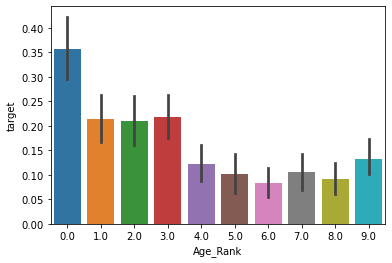

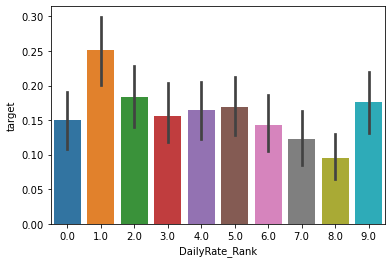

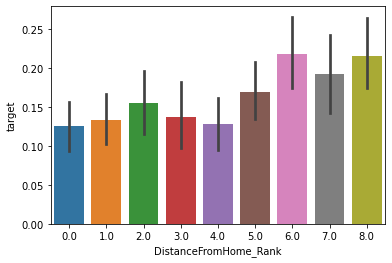

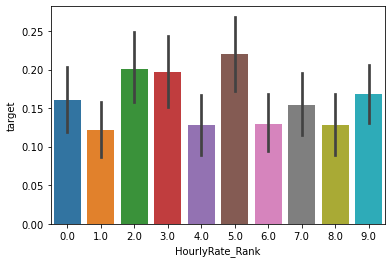

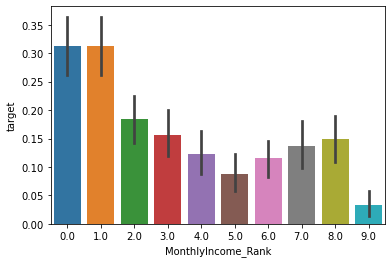

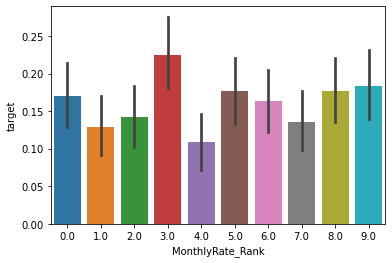

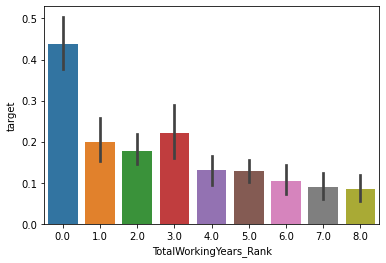

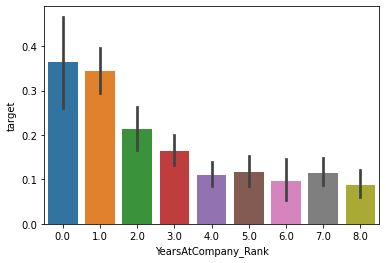

In [52]:
# check if a feature shows a slope at all
# if they do then do you see some deciles below the population average and some higher than population average?
# If that is the case then the slope will be strong
# Conculsion: A strong slope is indicative of the features ability to discrimnate the event from non event
#             making it a good predictor
#Percentage_income_goesinto_installments = Installment/annul_inc(Derived Variable/Feature Engineering)
X_bin_combined = pd.concat([Y, num_binned], axis = 1, join = 'inner')
from numpy import mean
for col in (num_binned.columns):
    plt.figure()
    sns.lineplot(x = col, y = Y.mean(), data = X_bin_combined, color = 'red')
    sns.barplot(x = col, y = 'target', data = X_bin_combined, estimator = mean)
plt.show()


In [53]:
num_varlist = ['DailyRate', 'HourlyRate', 'MonthlyRate']
num_1 = num_1.drop(num_varlist, axis = 1)

In [55]:
num_1.dtypes

Age                  float64
DistanceFromHome       int64
MonthlyIncome        float64
TotalWorkingYears    float64
YearsAtCompany       float64
dtype: object

# Part-3 - Select K Best

In [58]:
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=4)
selector.fit_transform(num_1, Y)
# Get columns to keep and create new data frame with those only
cols = selector.get_support(indices = True)
select_feature_df_num = num_1.iloc[:, cols]

# Feature Selection - Categorical Features

## Part-1-Zero Variance check

In [94]:
def unique_levels(x):
    x = x.value_counts().count()
    return(x)
char_unique_levels = pd.DataFrame(char.apply(lambda x : unique_levels(x)))

In [96]:
char_unique_levels.columns = ['feature_levels']
slice1 = char_unique_levels.loc[char_unique_levels['feature_levels']>1]
cat_list=slice1.index
char = char.loc[:,cat_list]

In [97]:
char.head(2)

BusinessTravel              Department EducationField  Gender  \
0      Travel_Rarely                   Sales  Life Sciences  Female   
1  Travel_Frequently  Research & Development  Life Sciences    Male   

              JobRole MaritalStatus OverTime  Education  \
0     Sales Executive        Single      Yes          2   
1  Research Scientist       Married       No          1   

   EnvironmentSatisfaction  JobInvolvement  JobLevel  JobSatisfaction  \
0                        2               3         2                4   
1                        3               2         2                2   

   NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
0                   8                 11                  3   
1                   1                 23                  4   

   RelationshipSatisfaction  StockOptionLevel  TrainingTimesLastYear  \
0                         1                 0                      0   
1                         4                 1                      3   

   WorkLifeBalance  YearsInCurrentRole  YearsSinceLastPromotion  \
0                1                   4                        0   
1                3                   7                        1   

   YearsWithCurrManager  
0                     5  
1                     7

# Part 2 - Bi Variate Analysis

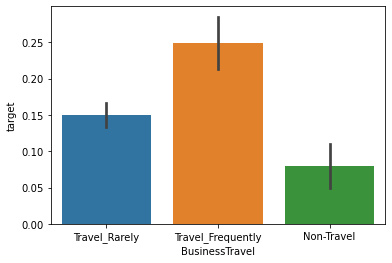

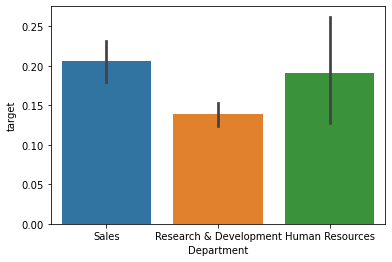

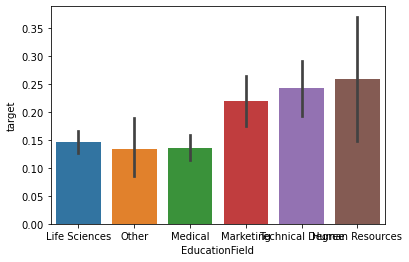

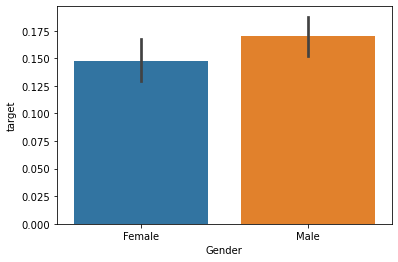

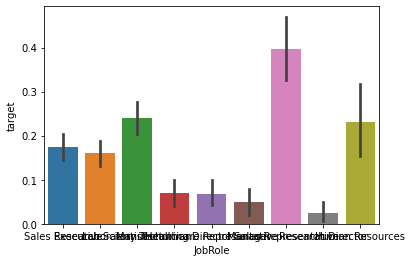

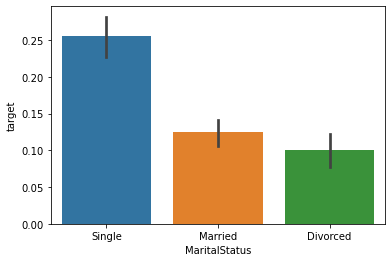

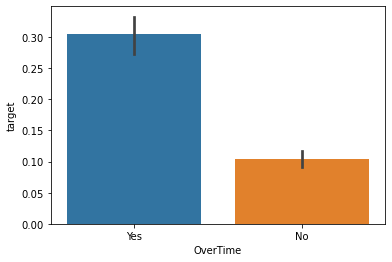

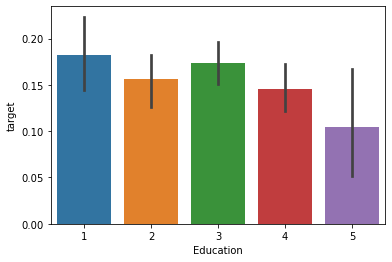

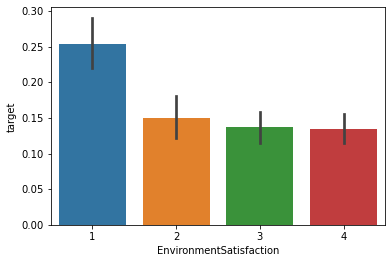

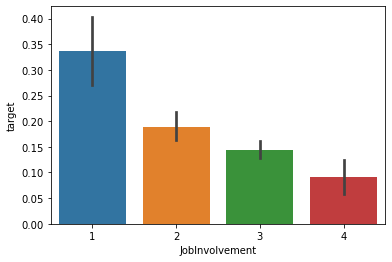

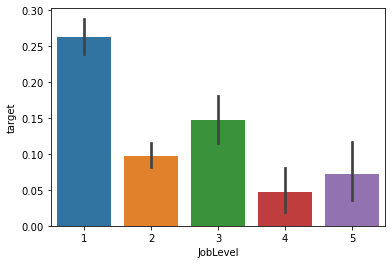

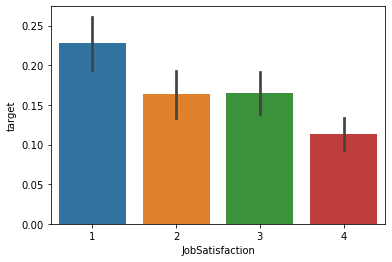

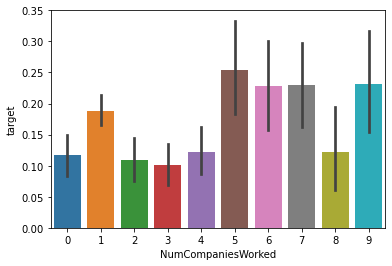

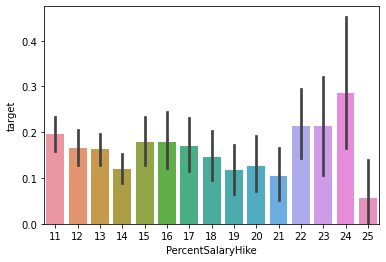

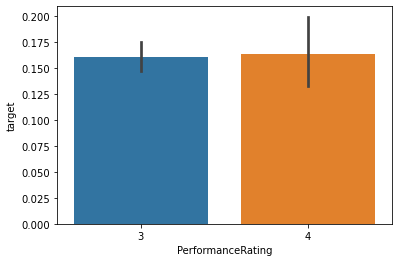

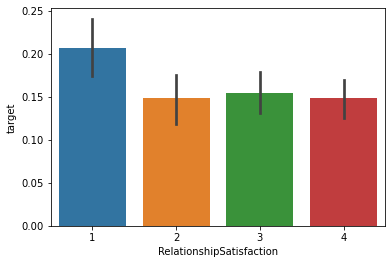

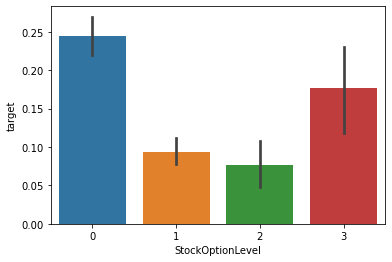

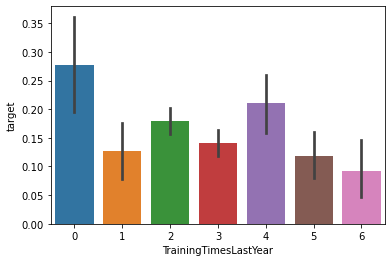

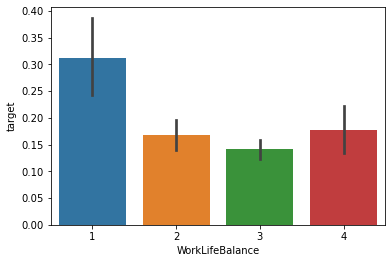

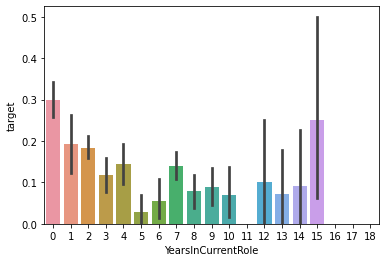

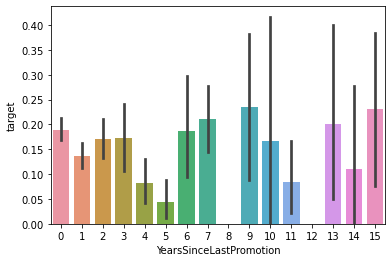

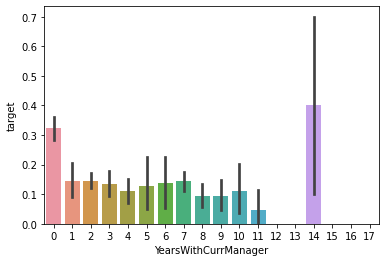

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
X_char_merged = pd.concat([Y, char], axis = 1, join = "inner")
from numpy import mean
for col in (char.columns):
    plt.figure()
    sns.barplot(x = col, y = "target", data=X_char_merged)
plt.show()

In [100]:
charlist = ['Gender', 'Education', 'PerformanceRating']
char_1 = char.drop(charlist, axis = 1)

In [106]:
char_1.shape

(2940, 20)

In [102]:
char_1.dtypes

BusinessTravel              object
Department                  object
EducationField              object
JobRole                     object
MaritalStatus               object
OverTime                    object
EnvironmentSatisfaction      int64
JobInvolvement               int64
JobLevel                     int64
JobSatisfaction              int64
NumCompaniesWorked           int64
PercentSalaryHike            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsInCurrentRole           int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

In [103]:
char_1['EnvironmentSatisfaction'] = char_1['EnvironmentSatisfaction'].astype('object')
char_1['JobInvolvement'] = char_1['JobInvolvement'].astype('object')
char_1['Joblevel'] = char_1['JobLevel'].astype('object')
char_1['JobSatisfaction'] = char_1['JobSatisfaction'].astype('object')
char_1['NumCompaniesWorked'] = char_1['NumCompaniesWorked'].astype('object')
char_1['PercentSalaryHike'] = char_1['PercentSalaryHike'].astype('object')
char_1['RelationshipSatisfaction'] = char_1['RelationshipSatisfaction'].astype('object')
char_1['StockOptionLevel'] = char_1['StockOptionLevel'].astype('object')
char_1['TrainingTimesLastYear'] = char_1['TrainingTimesLastYear'].astype('object')
char_1['WorkLifeBalance'] = char_1['WorkLifeBalance'].astype('object')
char_1['YearsInCurrentRole'] = char_1['YearsInCurrentRole'].astype('object')
char_1['YearsSinceLastPromotion'] = char_1['YearsSinceLastPromotion'].astype('object')
char_1['YearsWithCurrManager'] = char_1['YearsWithCurrManager'].astype('object')

In [104]:
# creatre dummy feature for n-1 levels
X_char_dum = pd.get_dummies(char_1, drop_first = True)
X_char_dum.shape

(2940, 122)

In [105]:
X_char_dum.head()

JobLevel  BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
0         2                                 0                             1   
1         2                                 1                             0   
2         1                                 0                             1   
3         1                                 1                             0   
4         1                                 0                             1   

   Department_Research & Development  Department_Sales  \
0                                  0                 1   
1                                  1                 0   
2                                  1                 0   
3                                  1                 0   
4                                  1                 0   

   EducationField_Life Sciences  EducationField_Marketing  \
0                             1                         0   
1                             1                         0   
2                             0                         0   
3                             1                         0   
4                             0                         0   

   EducationField_Medical  EducationField_Other  \
0                       0                     0   
1                       0                     0   
2                       0                     1   
3                       0                     0   
4                       1                     0   

   EducationField_Technical Degree  JobRole_Human Resources  \
0                                0                        0   
1                                0                        0   
2                                0                        0   
3                                0                        0   
4                                0                        0   

   JobRole_Laboratory Technician  JobRole_Manager  \
0                              0                0   
1                              0                0   
2                              1                0   
3                              0                0   
4                              1                0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                           0                        1   
1                           1                        0   
2                           0                        0   
3                           1                        0   
4                           0                        0   

   JobRole_Sales Representative  MaritalStatus_Married  MaritalStatus_Single  \
0                             0                      0                     1   
1                             0                      1                     0   
2                             0                      0                     1   
3                             0                      1                     0   
4                             0                      1                     0   

   OverTime_Yes  EnvironmentSatisfaction_2  EnvironmentSatisfaction_3  \
0             1                          1                          0   
1             0                          0                          1   
2             1                          0                          0   
3             1                          0                          0   
4             0                          0                          0   

   EnvironmentSatisfaction_4  JobInvolvement_2  JobInvolvement_3  \
0                          0                 0                 1   
1                

# Part 3 - Select K Best

In [108]:
# Select K Best for Categorical Features
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k = 110)
selector.fit_transform(X_char_dum, Y)
# Get Columns to keep and create new dataframe
cols = selector.get_support(indices = True)
select_feature_df_char = X_char_dum.iloc[:,cols]

# Creating the Master Feature Set for Model Development

In [109]:
X_all = pd.concat([select_feature_df_char, select_feature_df_num], axis = 1, join = 'inner')

In [110]:
X_all.shape

(2940, 114)

# Train Test Split

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, Y, test_size = 0.3, random_state = 20)

In [112]:
print("Shape of training data", X_train.shape)
print("Shape of testing data", X_test.shape)
print("Attrition rate in training data", y_train.mean())
print("Attrition rate in testing data", y_test.mean())

Shape of training data (2058, 114)
Shape of testing data (882, 114)
Attrition rate in training data target    0.158406
dtype: float64
Attrition rate in testing data target    0.1678
dtype: float64


In [ ]:
# Non linearity in feature relationships are observed which makes tree methods a good choice
# There are few options to consider among tree methods
# WHite Box (Completely Explainable set of rules) --> Decision Tree
# Ensemble Methods --> Random Forest (With Bagging) 
# Ensemble methods --> GBM / XGBoost (Boosting)

In [113]:
# Building a Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = 'gini', random_state = 20)

In [114]:
np.random.seed(44)
from sklearn.model_selection import GridSearchCV
param_dist = {"max_depth":[3,4,5], 'min_samples_split':[50,120,180,200,250]}
tree_grid = GridSearchCV(dtree, cv = 10, param_grid = param_dist, n_jobs = 2)
tree_grid.fit(X_train, y_train)
print("Best Parameters using Grid search", tree_grid.best_params_)

Best Parameters using Grid search {'max_depth': 3, 'min_samples_split': 50}


In [115]:
# Building a random forest Model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='gini', random_state = 20, max_depth = 4, min_samples_split=50)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_split=50, random_state=20)

In [116]:
# Buidling a Gradient Boosting Model
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier(criterion ='mse', random_state=20, max_depth=4,min_samples_split=50)
gbm.fit(X_train, y_train)

GradientBoostingClassifier(criterion='mse', max_depth=4, min_samples_split=50,
                           random_state=20)

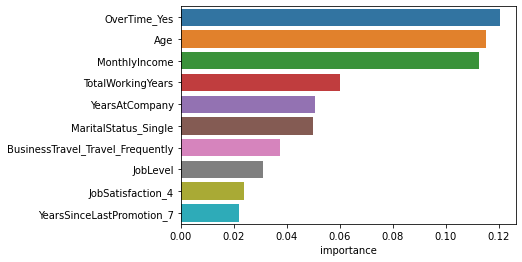

In [121]:
import pandas as pd
feature_importances = pd.DataFrame(gbm.feature_importances_,
                                  index=X_train.columns,
                                  columns = ['importance']).sort_values('importance', ascending=False)
ax = sns.barplot(x='importance', y= feature_importances.iloc[0:10].index,data=feature_importances.iloc[0:10])